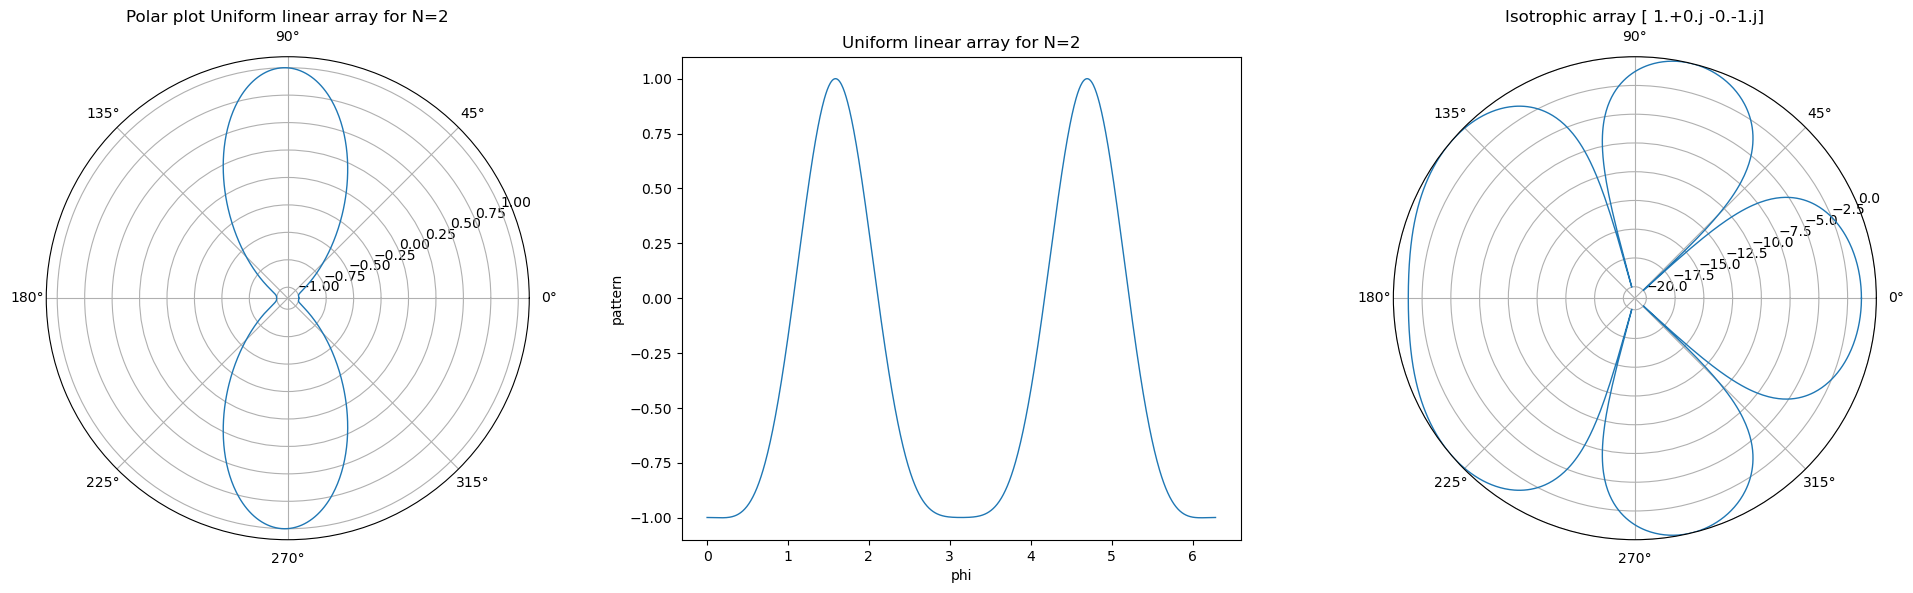

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Afactor(w,psi):
    j = np.arange(len(w))
    A = np.sum(w[j] * np.exp(j * 1j * psi[:, None]), axis=1)
    g = np.abs(A)
    return g

def para(d, w,de):
    """Return the power as a function of azimuthal angle, phi."""
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = (2*np.pi * d / lam) * np.cos(phi)+de
    return psi,phi

def get_directive_gain(g, minDdBi=-20):
    """Return the "directive gain" of the antenna array producing gain g."""
    DdBi = 10 * np.log10(g / np.max(g))
    return np.clip(DdBi, minDdBi, None)

def normal_rad_pattern(psi,N):
    pattern=(np.sin(N*psi/2)/np.sin(psi/2))/N
    return pattern

# Wavelength, antenna spacing, feed coefficients.
de=0.1 #electric phase
lam = 1
d = lam
N = np.array([1,-1j])#antennas

# Calculate gain and directive gain; plot on a polar chart.
psi,phi = para(d, N,de)
Af=Afactor(N,psi)
DdBi = get_directive_gain(Af)
pattern=normal_rad_pattern(psi,len(N))

fig = plt.figure(figsize=(20, 6))

ax=fig.add_subplot(131,polar=True)
ax.plot(phi, pattern, linewidth=1)
ax.set_title("Polar plot Uniform linear array for N={}".format(len(N)))

ax2=fig.add_subplot(132)
ax2.plot(phi, pattern, linewidth=1)
ax2.set_xlabel("phi")
ax2.set_ylabel("pattern")
ax2.set_title("Uniform linear array for N={}".format(len(N)))

ax3=fig.add_subplot(133,polar=True)
ax3.plot(phi, DdBi, linewidth=1)
ax3.set_title("Isotrophic array {}".format(N))

plt.tight_layout()
plt.show()

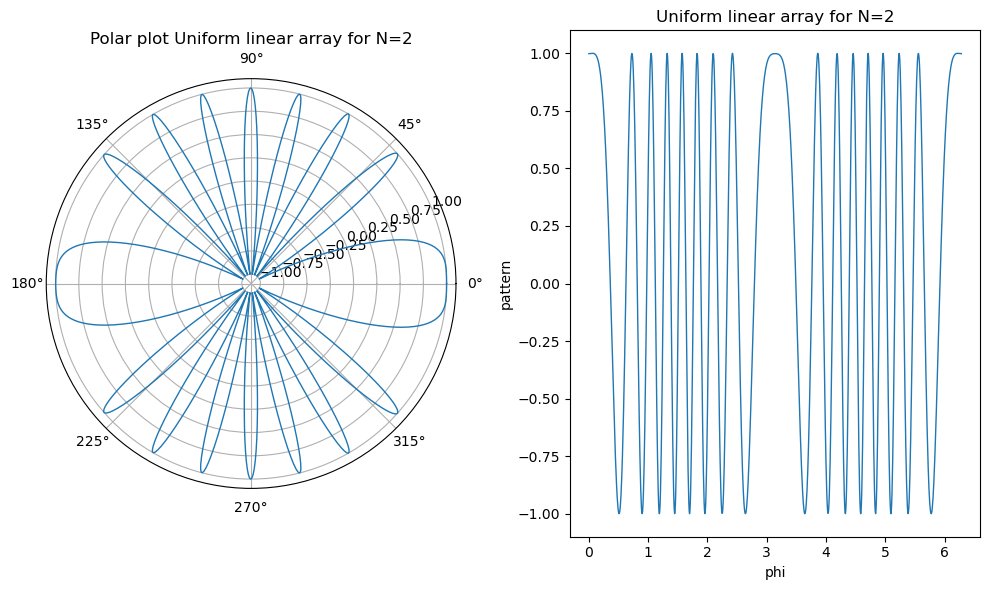

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def para(d, w,de):
    """Return the power as a function of azimuthal angle, phi."""
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = (2*np.pi * d / lam) * np.cos(phi)+de
    return psi,phi

def normal_rad_pattern(psi,N):
    pattern=(np.sin(N*psi/2)/np.sin(psi/2))/N
    return pattern

# Wavelength, antenna spacing, feed coefficients.
de=0.1 #electric phase
lam = 1
d = lam*8
N = 2

# Calculate gain and directive gain; plot on a polar chart.
psi,phi = para(d, N,de)
pattern=normal_rad_pattern(psi,N)

fig = plt.figure(figsize=(10, 6))

ax=fig.add_subplot(121,polar=True)
ax.plot(phi, pattern, linewidth=1)
ax.set_title("Polar plot Uniform linear array for N={}".format(N))

ax2=fig.add_subplot(122)
ax2.plot(phi, pattern, linewidth=1)
ax2.set_xlabel("phi")
ax2.set_ylabel("pattern")
ax2.set_title("Uniform linear array for N={}".format(N))


plt.tight_layout()
plt.show()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\abinj\anaconda3\envs\DIP\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\abinj\AppData\Local\Temp\ipykernel_6304\1226396678.py", line 20, in update_plot
    d_val = float(d_slider.get())
  File "c:\Users\abinj\anaconda3\envs\DIP\lib\tkinter\ttk.py", line 1096, in get
    return self.tk.call(self._w, 'get', x, y)
_tkinter.TclError: invalid command name ".!scale2"
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\abinj\anaconda3\envs\DIP\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\abinj\AppData\Local\Temp\ipykernel_6304\1226396678.py", line 21, in update_plot
    N_val = int(N_slider.get())
  File "c:\Users\abinj\anaconda3\envs\DIP\lib\tkinter\ttk.py", line 1096, in get
    return self.tk.call(self._w, 'get', x, y)
_tkinter.TclError: invalid command name ".!scale3"


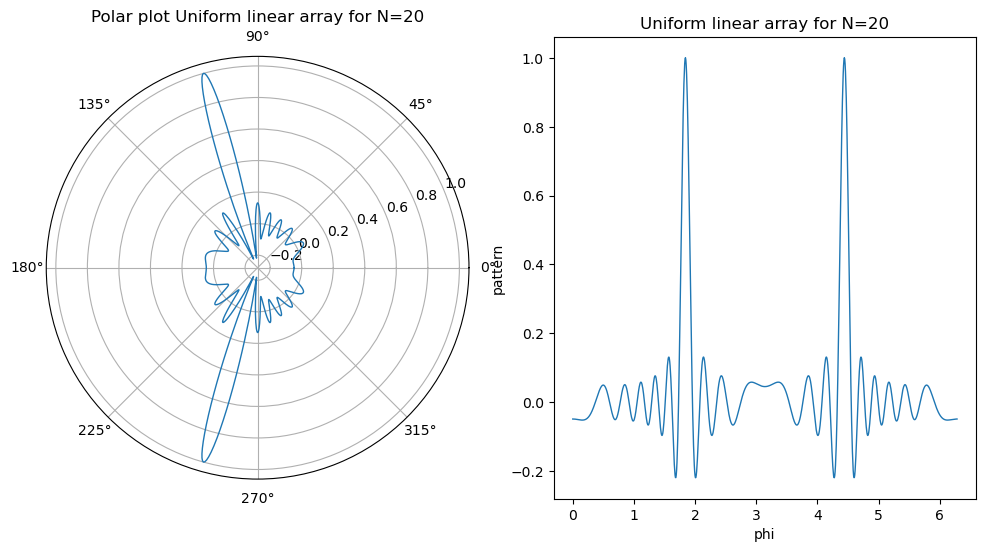

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk

def para(d, w, de):
    lam_val = 1.0
    phi = np.linspace(0, 2*np.pi, 1000)
    psi = (2*np.pi * d / lam_val) * np.cos(phi) + de
    return psi, phi

def normal_rad_pattern(psi, N):
    pattern = (np.sin(N*psi/2)/np.sin(psi/2))/N
    return pattern

def update_plot(event=None):
    de_val = float(de_slider.get())
    lam_val = 1.0  # Set lambda=1
    d_val = float(d_slider.get())
    N_val = int(N_slider.get())

    psi, phi = para(d_val, N_val, de_val)
    pattern = normal_rad_pattern(psi, N_val)

    ax.clear()
    ax.plot(phi, pattern, linewidth=1)
    ax.set_title("Polar plot Uniform linear array for N={}".format(N_val))

    ax2.clear()
    ax2.plot(phi, pattern, linewidth=1)
    ax2.set_xlabel("phi")
    ax2.set_ylabel("pattern")
    ax2.set_title("Uniform linear array for N={}".format(N_val))

    # Update the fraction label
    fraction_label.config(text="Fraction of Lambda: {:.2f}".format(d_val/lam_val))

    # Update the electric phase label
    de_label.config(text="Electric Phase: {:.2f}".format(de_val))

    canvas.draw()

# Initialize Tkinter
root = tk.Tk()
root.title("Antenna Pattern Plotter")

# Set default values
default_de = 0.1
default_N = 1

# Electric Phase (de) Slider
de_label = tk.Label(root, text="Electric Phase (de):")
de_label.grid(row=0, column=0, padx=10, pady=5)
de_slider = ttk.Scale(root, from_=0.1, to=0.9, orient="horizontal", length=200, command=update_plot)
de_slider.set(default_de)
de_slider.grid(row=0, column=1, padx=10, pady=5)

# Wavelength (lam) - Set to 1 by default

# Antenna Spacing (d) Slider
d_slider = ttk.Scale(root, from_=0.1, to=1.0, orient="horizontal", length=200, command=update_plot)
d_slider.set(default_de)
d_slider.grid(row=1, column=1, padx=10, pady=5)

# Fraction of Lambda Label
fraction_label = tk.Label(root, text='''Antenna Spacing (d): {:.2f} x lambda'''.format(default_de/1.0))
fraction_label.grid(row=1, column=0, padx=10, pady=5)

# Number of Antennas (N) Slider
N_label = tk.Label(root, text="Number of Antennas (N):")
N_label.grid(row=2, column=0, padx=10, pady=5)
N_slider = ttk.Scale(root, from_=1, to=20, orient="horizontal", length=200, command=update_plot)
N_slider.set(default_N)
N_slider.grid(row=2, column=1, padx=10, pady=5)

# Matplotlib plot
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, polar=True)
ax2 = fig.add_subplot(122)

canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.grid(row=0, column=3, rowspan=5, padx=10, pady=10)

# Initial plot
update_plot()

# Run the Tkinter event loop
root.mainloop()